#           Exploratory Data Analysis/Visualization with Haberman Dataset

**Description**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Objective**

To analyze the nearby percentage/numbers of breast cancer patient survived after breast cancer surgery at Chicago's Billings Hospital between 1958 to 1970 based on the patinet age, year of operation and number of cyst nodes.

To start with downloaded the Haberman dataset from "https://www.kaggle.com/gilsousa/habermans-survival-data-set" and import the same to jupyter notebook with all the required standard packages.


In [2]:
# 1. Importing standard packages

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [3]:
# 2. Loading Haberman Dataset to Pandas DataFrame.

hbman = pd.read_csv("haberman.csv")


In [4]:
# 3. Verifying total number of datapoints and features.

dtptsnfeat = hbman.shape

print("Total number of Datapoints are: ", dtptsnfeat[0])
print("Total number of Features are: ", dtptsnfeat[1])

Total number of Datapoints are:  306
Total number of Features are:  4


**Observation 3:**

Total number of points signifies the total number of rows/data/patient_data available in dataset which is 306. 
Total number of features signifies the total number of columns/variables available in dataset which is 4.

In [5]:
# 4. Fetching name of columns/variables.

print(hbman.columns)


Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Observation 4:**

Dataset has 4 variables as age of patient, year of operation, number of cyst nodes and survival status.

In [6]:
# 5. Verifying data points for each class.

print(hbman["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


**Observation 5: **

Haberman Dataset has imbalanced dataset with 225 patients survived the operation which is about 73.5% of total opeartion.

In [7]:
# 6. Verifying information and description of dataset.

print(hbman.info())

print(hbman.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


**Observation 6: **

i. Dataset has No Null values with 306 entries and memory usage of 9.6KB.

ii. Patients who undergone surgery had an average age of 52 years and with an average of 4 nodes.

iii. Patients range is between 30 years to 83 years.

iv. Most of the surgery performed in the year 1969.

v. 25% of patients has zero nodes and 50% has one node.

vi. Around 75% of patients has less than 4 nodes.

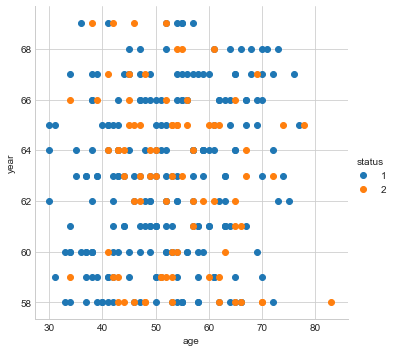

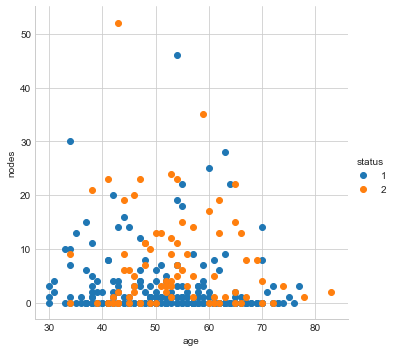

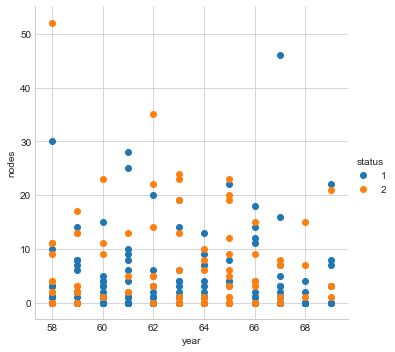

In [8]:
# 7. 2-D Scatter plot(Bivariate Analysis)

sns.set_style("whitegrid")

sns.FacetGrid(hbman, hue="status", size=5).map(plt.scatter, "age", "year").add_legend();
sns.FacetGrid(hbman, hue="status", size=5).map(plt.scatter, "age", "nodes").add_legend();
sns.FacetGrid(hbman, hue="status", size=5).map(plt.scatter, "year", "nodes").add_legend();

plt.show();

**Observation 7: **

As in all 3 cases variables are too much overlapping to each other which makes it very difficult to classify the data. Hence, 2-D scatter plotting method is not helpful to analyze given Haberman Dataset.

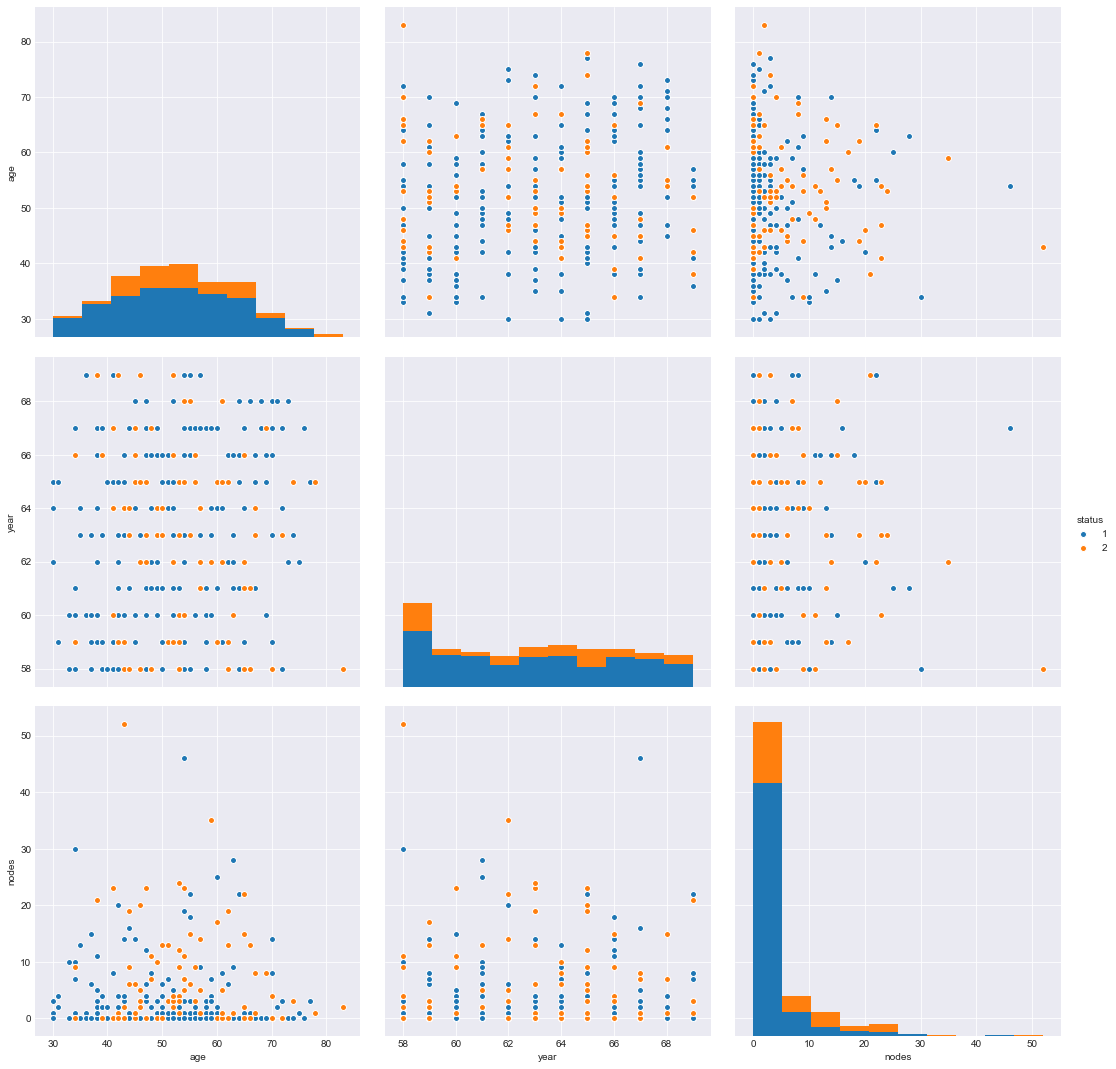

In [20]:
# 8. Pair-Plot(Bivariate Analysis)

plt.close();
sns.set_style("darkgrid");
sns.pairplot(hbman, vars=['age','year','nodes'], hue='status', size=5);
plt.show()

** Observation 8: **

In Pair plot also variables are overlapped and make it difficult to analyze any data for objective.

**Bivariate Analysis Observation**

It is very difficult to analyze given Herbman dataset using Bivariate analysis. 

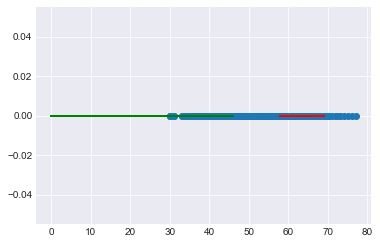

In [21]:
# 9. 1-D Scatter Plot.(Univarient Analysis)


hbman_survive = hbman.loc[hbman["status"] == 1];
hbman_not_survive = hbman.loc[hbman["status"] == 0];

plt.plot(hbman_survive["age"], np.zeros_like(hbman_survive['age']), 'o')
plt.plot(hbman_survive["year"], np.zeros_like(hbman_survive['year']), 'r')
plt.plot(hbman_survive["nodes"], np.zeros_like(hbman_survive['nodes']), 'g')

plt.show();



**Observation 9: **

1-D Scatter plot also cannot provide any conclusive evidence on Haberman dataset.


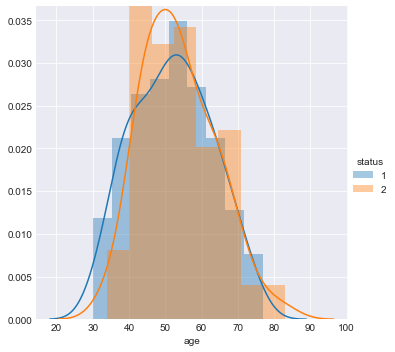

In [22]:
# 10. 1D Scatter using PDF for status-age(Univarient Analysis)

sns.FacetGrid(hbman, hue="status", size=5).map(sns.distplot, "age").add_legend();
plt.show();

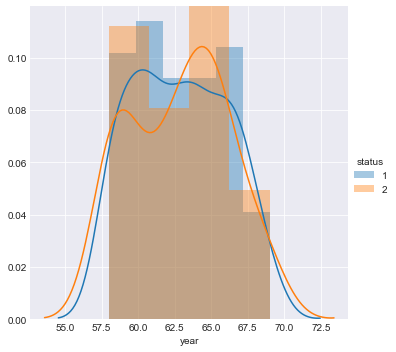

In [23]:
# 11. 1D Scatter using PDF for status-year(Univarient Analysis)

sns.FacetGrid(hbman, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.show()


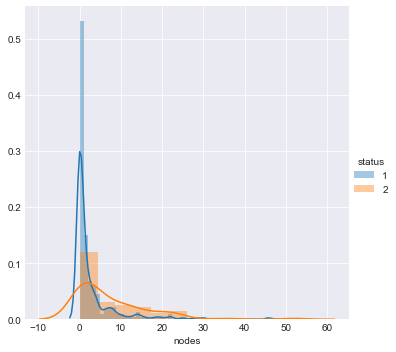

In [24]:
# 12. 1D Scatter using PDF for status-nodes(Univarient Analysis)
sns.FacetGrid(hbman, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.show();

**Observation 10-12:**

i. status vs patient age and year of surgery graph is overlapping and cannot conclude much.

ii. status vs nodes graph conclude that patient with node 0-1 has maximum chances of surviving after surgery.



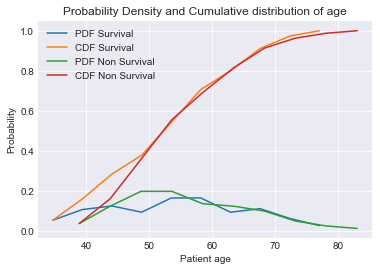

In [25]:
# 13. PDF and CDF of patient age.

hbman_pos = hbman.loc[hbman['status'] == 1]
hbman_neg = hbman.loc[hbman['status'] == 2]

counts_pos, bin_edges_pos = np.histogram(hbman_pos['age'], bins=10, density = True)
pdf_age_pos = counts_pos/(sum(counts_pos))
cdf_age_pos = np.cumsum(pdf_age_pos)

plt.plot(bin_edges_pos[1:],pdf_age_pos);
plt.plot(bin_edges_pos[1:], cdf_age_pos);

counts_neg, bin_edges_neg = np.histogram(hbman_neg['age'], bins=10, density = True)
pdf_age_neg = counts_neg/(sum(counts_neg))
cdf_age_neg = np.cumsum(pdf_age_neg)


plt.plot(bin_edges_neg[1:], pdf_age_neg);
plt.plot(bin_edges_neg[1:], cdf_age_neg);

plt.title("Probability Density and Cumulative distribution of age")
plt.xlabel("Patient age")
plt.ylabel("Probability")
plt.legend(['PDF Survival', 'CDF Survival', 'PDF Non Survival', 'CDF Non Survival'])
plt.show();


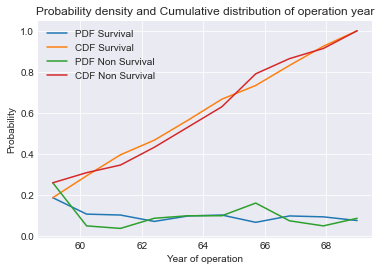

In [26]:
# 14. PDF and CDF of year.

counts_pos, bin_edges_pos = np.histogram(hbman_pos['year'], bins=10, density = True)
pdf_year_pos = counts_pos/(sum(counts_pos))
cdf_year_pos = np.cumsum(pdf_year_pos)

plt.plot(bin_edges_pos[1:],pdf_year_pos);
plt.plot(bin_edges_pos[1:], cdf_year_pos);

counts_neg, bin_edges_neg = np.histogram(hbman_neg['year'], bins=10, density = True)
pdf_year_neg = counts_neg/(sum(counts_neg))
cdf_year_neg = np.cumsum(pdf_year_neg)


plt.plot(bin_edges_neg[1:], pdf_year_neg);
plt.plot(bin_edges_neg[1:], cdf_year_neg);

plt.title("Probability density and Cumulative distribution of operation year")
plt.xlabel("Year of operation")
plt.ylabel("Probability")
plt.legend(['PDF Survival', 'CDF Survival', 'PDF Non Survival', 'CDF Non Survival'])
plt.show();

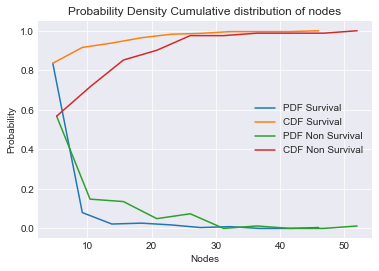

In [27]:
# 15. PDF and CDF of patient age.


counts_pos, bin_edges_pos = np.histogram(hbman_pos['nodes'], bins=10, density = True)
pdf_nodes_pos = counts_pos/(sum(counts_pos))
cdf_nodes_pos = np.cumsum(pdf_nodes_pos)

plt.plot(bin_edges_pos[1:],pdf_nodes_pos);
plt.plot(bin_edges_pos[1:], cdf_nodes_pos);

counts_neg, bin_edges_neg = np.histogram(hbman_neg['nodes'], bins=10, density = True)
pdf_nodes_neg = counts_neg/(sum(counts_neg))
cdf_nodes_neg = np.cumsum(pdf_nodes_neg)


plt.plot(bin_edges_neg[1:], pdf_nodes_neg);
plt.plot(bin_edges_neg[1:], cdf_nodes_neg);

plt.title("Probability Density Cumulative distribution of nodes")
plt.xlabel("Nodes")
plt.ylabel("Probability")
plt.legend(['PDF Survival', 'CDF Survival', 'PDF Non Survival', 'CDF Non Survival'])
plt.show();

**Observation 13-15**

i. Patient with age about less than 38 has survived after the surgery.

ii. Patient with age about greater than 77 not survived after surgery.

iii. Patient with nodes more than 47 not survived after the surgery.

iv. Patient with nodes less than 2 have high probability of survival.

In [28]:
# 16. Mean and Standard Deviation of dataset

print("Means and standard deviation of age:")
print("Mean of age is: ", np.mean(hbman['age']))
print("Mean of survived age is: ", np.mean(hbman_pos['age']))
print("Mean of non-survived age is: ", np.mean(hbman_neg['age']))
print("Std of age is: ", np.std(hbman['age']))
print("Std of survived age is: ", np.std(hbman_pos['age']))
print("Std of non- survived age is: ", np.std(hbman_neg['age']))
print("\n")
print("Means and standard deviation of year:")
print("Mean of year is: ", np.mean(hbman['year']))
print("Mean of survived year is: ", np.mean(hbman_pos['year']))
print("Mean of non-survived age is: ", np.mean(hbman_neg['year']))
print("Std of year is: ", np.std(hbman['year']))
print("Std of survived year is: ", np.std(hbman_pos['year']))
print("Std of non- survived year is: ", np.std(hbman_neg['year']))
print("\n")
print("Means and standard deviation of nodes:")
print("Mean of nodes is: ", np.mean(hbman['nodes']))
print("Mean of survived node is: ", np.mean(hbman_pos['nodes']))
print("Mean of non-survived year is: ", np.mean(hbman_neg['nodes']))
print("Std of node is: ", np.std(hbman['nodes']))
print("Std of survived node is: ", np.std(hbman_pos['nodes']))
print("Std of non- survived nodes is: ", np.std(hbman_neg['nodes']))


Means and standard deviation of age:
Mean of age is:  52.45751633986928
Mean of survived age is:  52.01777777777778
Mean of non-survived age is:  53.67901234567901
Std of age is:  10.78578520363183
Std of survived age is:  10.98765547510051
Std of non- survived age is:  10.10418219303131


Means and standard deviation of year:
Mean of year is:  62.85294117647059
Mean of survived year is:  62.86222222222222
Mean of non-survived age is:  62.82716049382716
Std of year is:  3.244090833563246
Std of survived year is:  3.2157452144021956
Std of non- survived year is:  3.3214236255207883


Means and standard deviation of nodes:
Mean of nodes is:  4.026143790849673
Mean of survived node is:  2.7911111111111113
Mean of non-survived year is:  7.45679012345679
Std of node is:  7.177896092811152
Std of survived node is:  5.857258449412131
Std of non- survived nodes is:  9.128776076761632


**Observation 16**

i. Not much difference is showing in Mean of survived and non survived patient age and year of operation.

ii. Patient with node upto 2-3 has high chances of survival.

iii. Patient with node greater than 7 has high chances of non- survival.

iv. Even if we take standard deviation into consideration, points ii and iii nullify the existence because of high standard deviation.

In [29]:
# 17. Median, Quantiles, Percentiles,IQR.

print("Medians of age :")
print("Median of age: ", np.median(hbman['age']))
print("Median of survived patient : ", np.median(hbman_pos['age']))
print("Median of non-survived patient: ", np.median(hbman_neg['age']))
print("\n")
print("Medians of year :")
print("Median of year: ", np.median(hbman['year']))
print("Median of survived year : ", np.median(hbman_pos['year']))
print("Median of non-survived year: ", np.median(hbman_neg['year']))
print("\n")
print("Medians of nodes :")
print("Median of nodes: ", np.median(hbman['nodes']))
print("Median of survived nodes : ", np.median(hbman_pos['nodes']))
print("Median of non-survived nodes: ", np.median(hbman_neg['nodes']))

print("\n")
print("Quantiles: ")
print("All Patient age: ", np.percentile(hbman['age'], np.arange(0, 100, 25)))
print("Survived Patient age: ", np.percentile(hbman_pos['age'], np.arange(0, 100, 25)))
print("Non-Survived Patient age: ", np.percentile(hbman_neg['age'], np.arange(0, 100, 25)))
print("Year: ", np.percentile(hbman['year'], np.arange(0, 100, 25)))
print("Survived Year: ", np.percentile(hbman_pos['year'], np.arange(0, 100, 25)))
print("Non Survived Year: ", np.percentile(hbman_neg['year'], np.arange(0, 100, 25)))
print("Nodes", np.percentile(hbman['nodes'], np.arange(0, 100, 25)))
print("Survived Nodes", np.percentile(hbman_pos['nodes'], np.arange(0, 100, 25)))
print("Non-survived nodes", np.percentile(hbman_neg['nodes'], np.arange(0, 100, 25)))

print("\n")
print("100th Percentiles:")
print(np.percentile(hbman['age'], 100))
print(np.percentile(hbman_pos['age'], 100))
print(np.percentile(hbman_neg['age'], 100))
print(np.percentile(hbman['year'], 100))
print(np.percentile(hbman_pos['year'], 100))
print(np.percentile(hbman_neg['year'], 100))
print(np.percentile(hbman['nodes'], 100))
print(np.percentile(hbman_pos['nodes'], 100))
print(np.percentile(hbman_neg['nodes'], 100))

print("\n")
from statsmodels import robust
print ("Median Absolute Deviation")
print(robust.mad(hbman["age"]))
print(robust.mad(hbman_pos["age"]))
print(robust.mad(hbman_neg["age"]))
print(robust.mad(hbman["year"]))
print(robust.mad(hbman_pos["year"]))
print(robust.mad(hbman_neg["year"]))
print(robust.mad(hbman["nodes"]))
print(robust.mad(hbman_pos["nodes"]))
print(robust.mad(hbman_neg["nodes"]))

Medians of age :
Median of age:  52.0
Median of survived patient :  52.0
Median of non-survived patient:  53.0


Medians of year :
Median of year:  63.0
Median of survived year :  63.0
Median of non-survived year:  63.0


Medians of nodes :
Median of nodes:  1.0
Median of survived nodes :  0.0
Median of non-survived nodes:  4.0


Quantiles: 
All Patient age:  [ 30.    44.    52.    60.75]
Survived Patient age:  [ 30.  43.  52.  60.]
Non-Survived Patient age:  [ 34.  46.  53.  61.]
Year:  [ 58.    60.    63.    65.75]
Survived Year:  [ 58.  60.  63.  66.]
Non Survived Year:  [ 58.  59.  63.  65.]
Nodes [ 0.  0.  1.  4.]
Survived Nodes [ 0.  0.  0.  3.]
Non-survived nodes [  0.   1.   4.  11.]


100th Percentiles:
83.0
77.0
83.0
69.0
69.0
69.0
52.0
46.0
52.0


Median Absolute Deviation
11.860817748
13.3434199666
11.860817748
4.44780665552
4.44780665552
4.44780665552
1.48260221851
0.0
5.93040887402


**Observation 17**

i. Patient with nodes 4 or more has high chances of non-survival.(Node - median)

ii. Patient with age less than 34 survived the surgery. (Non - survived age - Quantiles)

iii. 75% of patient survived if they have no nodes(survived node- Quantiles)

iv. 50% of patient not survived if they have nodes greater than 4(non-survived nodes - Quantiles)

v. Patient with age greater than 77 has no survival.(survived patient - 100th percentile)

vi. patient with nodes greater than 46 has no survival.(non-survived nodes- 100th percentile)

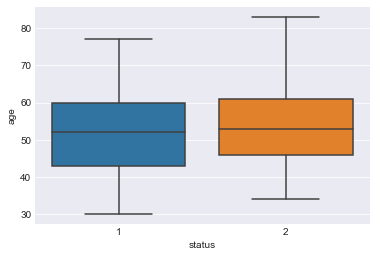

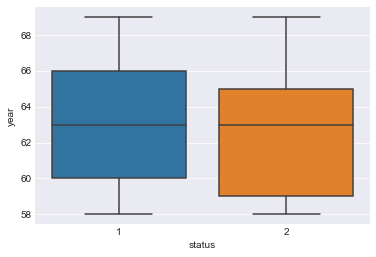

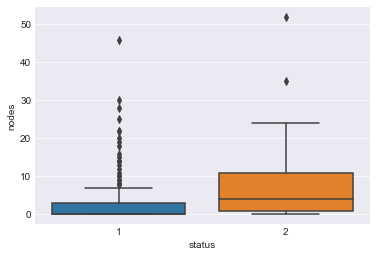

In [30]:
# 18. Box Plot and Whiskers

sns.boxplot(x='status', y='age', data=hbman)
plt.show()

sns.boxplot(x='status', y='year', data=hbman)
plt.show()

sns.boxplot(x='status', y='nodes', data=hbman)
plt.show()


**Observation 18:**

i. Min whisker in status-age claerly shows that people with age less than near about 35 successfully survived the surgery and max whisker shows that patient with age greater than near about 77 not survived the surgery.

ii. status-year box plot conclude that patient non survival numbers are too high between 1959-1960 than survived patient and between 1965-1966 situation was vice versa.

iii. nodes-status box plot conclude that patients are very rarely survive if they have nodes greater than 3/4.

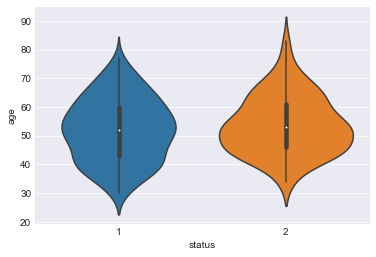

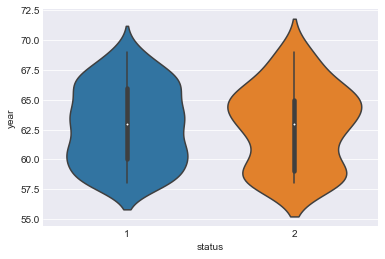

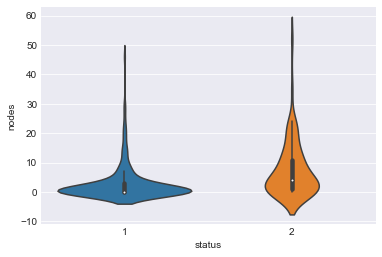

In [31]:
# 19. Violin plots

sns.violinplot(x="status", y="age", data=hbman, size=8)
plt.show()

sns.violinplot(x="status", y="year", data=hbman, size=8)
plt.show()

sns.violinplot(x="status", y="nodes", data=hbman, size=8)
plt.show()

**Observation 19: **

i. status-age violin plot conclude that among survived patient, patient with age between 50-55(dense) has more survival and non-survival has dense numbers between 45-50.

ii. status-year plot conclude that year 1964-1965 saw more unsuccessfull surgery.

iii. status-nodes plot conclude that patient with node between 0-1 has most number of survivals.